In [55]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
shooting = pd.read_excel('Mancity.xlsx',sheet_name = 'Shooting')
passing = pd.read_excel('Mancity.xlsx',sheet_name = 'Passing')
possession = pd.read_excel('Mancity.xlsx',sheet_name = 'Possession')

In [3]:
pl_shooting = shooting[shooting.Comp == 'Premier League']
pl_passing = passing[passing.Comp == 'Premier League']
pl_possession = possession[possession.Comp == 'Premier League']

### Glossary

<details>
<summary>Click to expand: For Manchester City</summary>

**For Manchester City**
- **Date**: Date listed is local to the match
- **Time**: Time listed is local to the match venue
  - Time is written in the 24-hour notation
  - Your local time is in (·)
- **Comp**: Competition
  - Number next to competition states which level in the country's league pyramid this league occupies.
- **Round**: Round or Phase of Competition
- **Day**: Day of the week
- **GF**: Goals For
  - Goals For
- **GA**: Goals Against
  - Goals Against
  - **Standard**
- **Gls**: Goals
  - Goals scored or allowed
- **Sh**: Shots Total
  - Shots Total
  - Does not include penalty kicks
- **SoT**: Shots on Target
  - Shots on Target
  - Note: Shots on target do not include penalty kicks
- **SoT%**: Shots on Target %
  - Percentage of shots that are on target
  - Minimum .395 shots per squad game to qualify as a leader
  - Note: Shots on target do not include penalty kicks
- **G/Sh**: Goals/Shot
  - Goals per shot
  - Minimum .395 shots per squad game to qualify as a leader
- **G/SoT**: Goals/Shot on Target
  - Goals per shot on target
  - Minimum .111 shots on target per squad game to qualify as a leader
  - Note: Shots on target do not include penalty kicks
- **Dist**: Average Shot Distance
  - Average distance, in yards, from the goal of all shots taken
  - Minimum .395 shots per squad game to qualify as a leader
  - Does not include penalty kicks
- **FK**: Shots from Free Kicks
  - Shots from Free Kicks
- **PK**: Penalty Kicks Made
  - Penalty Kicks Made
- **PKatt**: Penalty Kicks Attempted
  - Penalty Kicks Attempted
- **Expected**
- **xG**: Expected Goals
  - Expected Goals
  - xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
  - Provided by Opta.
  - An underline indicates there is a match that is missing data, but will be updated when available.
- **npxG**: Non-Penalty xG
  - Non-Penalty Expected Goals
  - Provided by Opta.
  - An underline indicates there is a match that is missing data, but will be updated when available.
- **npxG/Sh**: npxG/Shot
  - Non-Penalty Expected Goals per shot
  - Provided by Opta.
  - An underline indicates there is a match that is missing data, but will be updated when available.
  - Minimum .395 shots per squad game to qualify as a leader
- **G-xG**: Goals - xG
  - Goals minus Expected Goals
  - xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
  - Provided by Opta.
  - An underline indicates there is a match that is missing data, but will be updated when available.
- **np:G-xG**: Non-Penalty Goals - npxG
  - Non-Penalty Goals minus Non-Penalty Expected Goals
  - xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
  - Provided by Opta.
  - An underline indicates there is a match that is missing data, but will be updated when available.

<details open>
<summary>Click to contract</summary></details>
</details>

In [10]:
merged = pl_shooting.merge(pl_passing,how='left',left_on=['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA','Opponent'],right_on=['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA','Opponent'])

In [16]:
df = merged.merge(pl_possession,how='left',left_on=['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA','Opponent'],right_on=['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA','Opponent'])

### Correlation within parameters

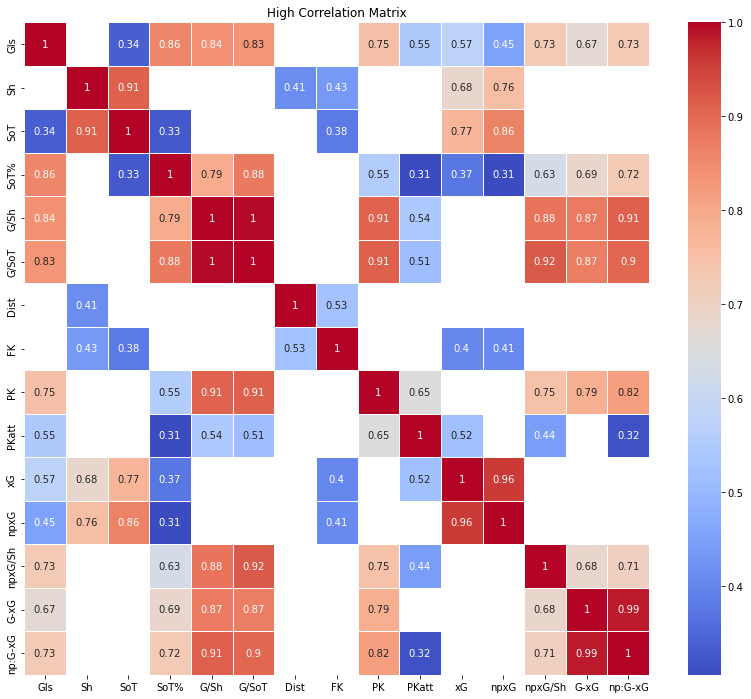

In [30]:
# Shooting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame (replace 'df' with your DataFrame)
# Example DataFrame:
# df = pd.read_csv('your_dataset.csv')

# Calculate the correlation matrix for all parameters
correlation_matrix = pl_shooting.corr()

# Set a threshold for high correlation (e.g., 0.3)
threshold = 0.3

# Filter correlations to include only those above the threshold
high_correlation_matrix = correlation_matrix[correlation_matrix > threshold]

# Set a larger figure size
plt.figure(figsize=(14, 12))

# Visualize the high correlation matrix
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("High Correlation Matrix")
plt.show()


In [56]:
# Convert 'Date' to datetime and then to date
pl_shooting['Date'] = pd.to_datetime(pl_shooting['Date']).dt.date

In [57]:
# # Create separate DataFrames for each result
# result_w = pl_shooting[pl_shooting['Result'] == 'W']
# result_l = pl_shooting[pl_shooting['Result'] == 'L']
# result_d = pl_shooting[pl_shooting['Result'] == 'D']

# # Create a line chart for each result
# fig, ax = plt.subplots(figsize=(12, 8))

# # Combine all data for x-ticks and labels
# combined_data = result_w.append(result_l).append(result_d)
# x_labels = [f"{date}\n{opponent}" for date, opponent in zip(combined_data['Date'], combined_data['Opponent'])]

# for result_df, color, label in [(result_w, 'g', 'Wins'), (result_l, 'r', 'Losses'), (result_d, 'b', 'Draws')]:
#     ax.plot(result_df['Date'], result_df['SoT'], label=f'{label} - SoT', marker='o', linestyle='-')
#     ax.plot(result_df['Date'], result_df['xG'], label=f'{label} - xG', marker='o', linestyle='--')
#     ax.plot(result_df['Date'], result_df['Gls'], label=f'{label} - Gls', marker='o', linestyle=':')
    
# ax.set_xticks(combined_data['Date'])  # Set x-ticks using combined data
# ax.set_xticklabels(x_labels, rotation=45)

# ax.set_title('Performance Over Time by Match Result and Opponent')
# ax.set_xlabel('Date & Opponent')
# ax.set_ylabel('Values')
# ax.grid(True)

# # Place legends outside the chart
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.show()


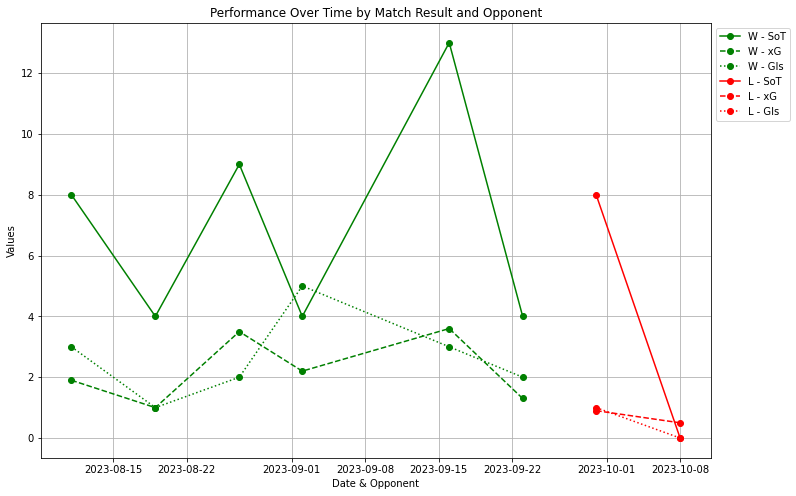

In [58]:
# Create a color map for categories (W, L, D)
color_map = {'W': 'green', 'L': 'red', 'D': 'blue'}

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 8))

for result in pl_shooting['Result'].unique():
    result_df = pl_shooting[pl_shooting['Result'] == result]
    ax.plot(result_df['Date'], result_df['SoT'], label=f'{result} - SoT', color=color_map[result], marker='o', linestyle='-')
    ax.plot(result_df['Date'], result_df['xG'], label=f'{result} - xG', color=color_map[result], marker='o', linestyle='--')
    ax.plot(result_df['Date'], result_df['Gls'], label=f'{result} - Gls', color=color_map[result], marker='o', linestyle=':')
    
ax.set_title('Performance Over Time by Match Result and Opponent')
ax.set_xlabel('Date & Opponent')
ax.set_ylabel('Values')
ax.grid(True)

# Place legends outside the chart
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [59]:
# # Create a line chart for each result
# fig, ax = plt.subplots(figsize=(12, 8))

# for result_df, color, label in [(result_w, 'g', 'Wins'), (result_l, 'r', 'Losses'), (result_d, 'b', 'Draws')]:
#     ax.plot(result_df['Date'], result_df['SoT'], label=f'{label} - SoT', marker='o', linestyle='-')
#     ax.plot(result_df['Date'], result_df['xG'], label=f'{label} - xG', marker='o', linestyle='--')
#     ax.plot(result_df['Date'], result_df['Gls'], label=f'{label} - Gls', marker='o', linestyle=':')

# ax.set_title('Performance Over Time by Match Result and Opponent')
# ax.set_xlabel('Date')
# ax.set_ylabel('Values')
# ax.xaxis.set_tick_params(rotation=45)
# ax.grid(True)

# # Place legends outside the chart
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.show()

In [62]:
# # Create separate DataFrames for each result
# result_w = df[df['Result'] == 'W']
# result_l = df[df['Result'] == 'L']
# result_d = df[df['Result'] == 'D']

# # Create a line chart for each result
# plt.figure(figsize=(10, 6))

# for result_df, color, label in [(result_w, 'g', 'Wins'), (result_l, 'r', 'Losses'), (result_d, 'b', 'Draws')]:
#     plt.plot(result_df['Date'].dt.strftime('%Y-%m-%d') + ' - ' + result_df['Opponent'], result_df['SoT'],
#              label=f'{label} - SoT', marker='o', linestyle='-', color=color)
#     plt.plot(result_df['Date'].dt.strftime('%Y-%m-%d') + ' - ' + result_df['Opponent'], result_df['xG'],
#              label=f'{label} - xG', marker='o', linestyle='--', color=color)
#     plt.plot(result_df['Date'].dt.strftime('%Y-%m-%d') + ' - ' + result_df['Opponent'], result_df['Gls'],
#              label=f'{label} - Gls', marker='o', linestyle=':', color=color)

# plt.title('Performance Over Time by Match Result and Opponent')
# plt.xlabel('Date - Opponent')
# plt.ylabel('Values')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.legend()
# plt.grid(True)

# plt.show()

In [61]:
# # Create separate DataFrames for each result
# result_w = df[df['Result'] == 'W']
# result_l = df[df['Result'] == 'L']
# result_d = df[df['Result'] == 'D']

# # Create a line chart for each result
# plt.figure(figsize=(10, 6))

# for result_df, color, label in [(result_w, 'g', 'Wins'), (result_l, 'r', 'Losses'), (result_d, 'b', 'Draws')]:
#     plt.plot(result_df['Date'].dt.strftime('%Y-%m-%d') + ' - ' + result_df['Opponent'], result_df['SoT'],
#              label=label, marker='o', linestyle='-', color=color)

# plt.title('Shots on Target Over Time by Match Result and Opponent')
# plt.xlabel('Date - Opponent')
# plt.ylabel('Shots on Target')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.legend()
# plt.grid(True)

# plt.show()

In [60]:
# # Create separate DataFrames for each result
# result_w = pl_shooting[pl_shooting['Result'] == 'W']
# result_l = pl_shooting[pl_shooting['Result'] == 'L']
# result_d = pl_shooting[pl_shooting['Result'] == 'D']

# # Create a line chart for each result
# plt.figure(figsize=(10, 6))

# plt.plot(result_w['Date'], result_w['SoT'], label='Wins', marker='o', linestyle='-', color='g')
# plt.plot(result_l['Date'], result_l['SoT'], label='Losses', marker='o', linestyle='-', color='r')
# plt.plot(result_d['Date'], result_d['SoT'], label='Draws', marker='o', linestyle='-', color='b')

# plt.title('Shots on Target Over Time by Match Result')
# plt.xlabel('Date')
# plt.ylabel('Shots on Target')
# plt.legend()
# plt.grid(True)

# plt.show()